# Numerical Simulation Laboratory                                                         
                                        Department of Physics, University of Milan(It)
                                        Spring 2020 
                                                                     Mattia Corigliano
## 3<sup>rd </sup> Computational Exercise

## Monte Carlo Plain vanilla option pricing 

*In this computational exercise we studied the financial problem of pricing the plain vanilla options with Monte Carlo methods. Altough an analytical solution to this problem in terms of Geometric Brownian Motion (GBM) was provided by Black and Scholes in the late 1973, a numerical approach is also quite interesting as it can be generalizable to situations where no analytical solutions exist. The correctness of our Monte Carlo simulations is tested showing the results together with the predictions of the Black and Scholes model.*

In [6]:
### importing useful libraries
import numpy as np
import matplotlib.pyplot as plt

##  setting the Layout
import matplotlib as mpl
## LINES
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'
## AXES
mpl.rcParams['axes.linewidth'] = 1 ## edge linewidth
mpl.rcParams['axes.grid'] = True ## display grid or not
mpl.rcParams['axes.titlesize'] = 16 ## fontsize of the axes title
#mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 14  ## fontsize of the x any y labels
mpl.rcParams['axes.formatter.limits'] = [-2,6] # use scientific notation if log10
mpl.rcParams['axes.formatter.use_mathtext'] = True # When True, use mathtext for scientific
mpl.rcParams['legend.fontsize'] = 12
## TICKS
mpl.rcParams['xtick.labelsize'] = 12 ## fontsize of the tick labels
mpl.rcParams['ytick.labelsize'] = 12 
mpl.rcParams['xtick.minor.visible'] = True ## visibility of minor ticks on x-axis
mpl.rcParams['ytick.minor.visible'] = True
## FIGURE
mpl.rcParams['figure.titleweight'] = 'bold' ## weight of the figure title
mpl.rcParams['figure.subplot.wspace'] = 0.3
mpl.rcParams['figure.subplot.hspace'] = 0.7
## ERRORBARS
mpl.rcParams['errorbar.capsize'] = 2  ## length of end cap on error bars in pixels

The parameters used in the simulation are the following: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$


We tackled this problem numerically in two different ways:

1. By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$ and then the call and put option are sampled respectively as:

$$ C = \exp(-rT) \max[0, S(T)-K] $$ and $$ P = \exp(-rT) \max[0, K-S(T)] $$


2. By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

In both ways, on the resulting sampled values we performed data-blocking to obtain reliable estimates of the mean and its associated errors.

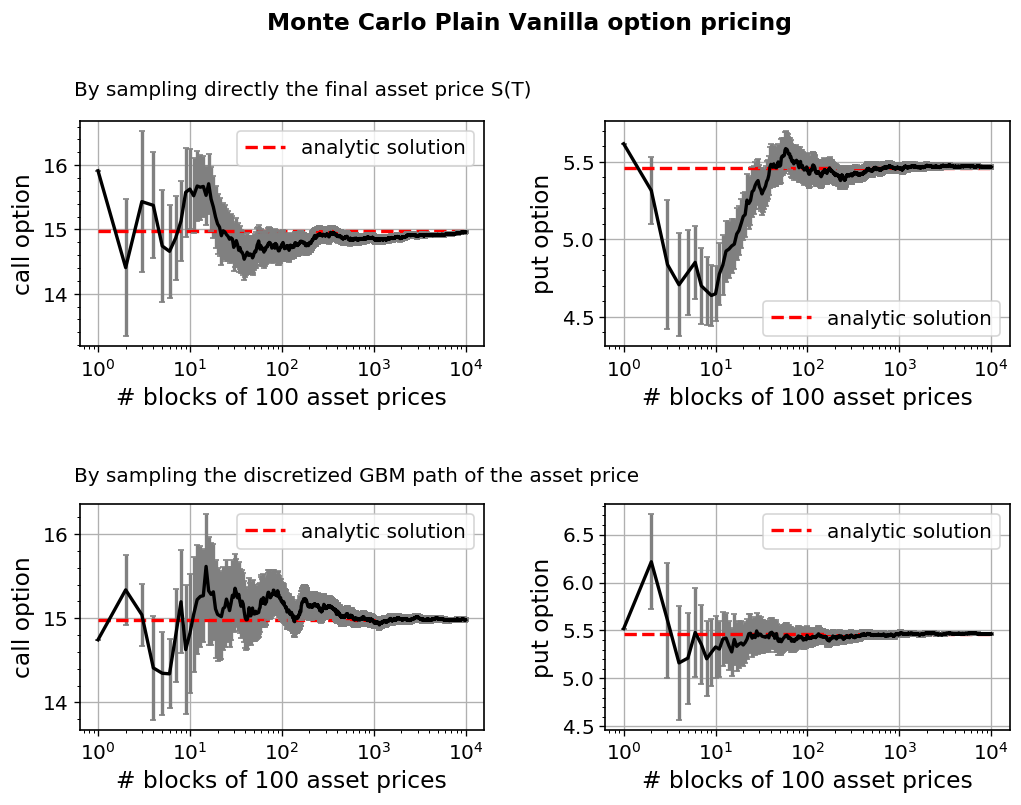

In [5]:
plt.figure(figsize=(10, 7), dpi=120)
plt.suptitle('Monte Carlo Plain Vanilla option pricing', size=14)
mpl.rcParams['figure.subplot.top'] = 0.85

data = np.loadtxt("data/output.txt").T
block_length = int(data[0][0])
analytical_solution = [14.975790778311286, 5.4595325819072364]*2

Nplots = [1, 2, 3, 4]
xlabels = ['# blocks of {} asset prices'.format(block_length)]*4
ylabels = ['call option', 'put option']*2

for plot in Nplots:
    plt.subplot(2, 2, plot); 
    plt.errorbar(data[0]/block_length, 
                 data[2*plot-1], 
                 yerr=data[2*plot], 
                 color = 'black', 
                 ecolor="gray")
    plt.hlines(analytical_solution[plot-1], 1, 10000, ls = '--', color='red', lw = 2,
              label = 'analytic solution')
    plt.semilogx()
    plt.legend()
    plt.xlabel(xlabels[plot-1])
    plt.ylabel(ylabels[plot-1])

fig = plt.gcf()
fig.text(0.12, 0.88, "By sampling directly the final asset price S(T)", size = 12)
fig.text(0.12, 0.42, "By sampling the discretized GBM path of the asset price", size = 12)
plt.show()

**NB:**

In the panel above the numerical solution (black), calculated with the data-blocking technique, is shown together with the analytical prediction of the Black-Scholes model.